# IM939 - Lab 7 Part 3


## Source
"Annual gender pay gap estimates for UK employees by age, occupation, industry, full-time and part-time, region and other geographies, and public and private sector. Compiled from the Annual Survey of Hours and Earnings."
https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/annualsurveyofhoursandearningsashegenderpaygaptables

## Explanations
^  Gender pay gap defined as the difference between men's and women's hourly earnings as a percentage of men's earnings.			
^^ Employees on adult rates whose pay for the survey pay-period was not affected by absence. Estimates for 2020 include employees who have been furloughed under the Coronavirus Job Retention Scheme (CJRS).			

Source: Annual Survey of Hours and Earnings, Office for National Statistics.			
Table 2.12 Gender pay gap (%)^  - For all employee jobs^^: United Kingdom, 2020	

### Definitions																									
• Gender pay gap (GPG) - calculated as the difference between average hourly earnings (excluding overtime) of men and women as a proportion of average hourly earnings (excluding overtime) of men. For example, a 4% GPG denotes that women earn 4% less, on average, than men. Conversely, a -4% GPG denotes that women earn 4% more, on average, than men.					
																									
• Mean - a measure of the average which is derived by summing the values for a given sample, and then dividing the sum by the number of observations (i.e. jobs) in the sample. In earnings distributions, the mean can be disproportionately influenced by a relatively small number of high-paying jobs.																
																									
• Median - the value below which 50% of jobs fall. It is ONS's preferred measure of average earnings as it is less affected by a relatively small number of very high earners and the skewed distribution of earnings. It therefore gives a better indication of typical pay than the mean.																					
																									
• Full-time - employees working more than 30 paid hours per week (or 25 or more for the teaching professions).			
																									
### Coverage and timeliness																									
ASHE covers employee jobs in the United Kingdom. It does not cover the self-employed, nor does it cover employees not paid during the reference period.																									
GPG estimates are provided for the pay period that included a specified date in April. They relate to employees on adult rates of pay, whose earnings for the survey pay period were not affected by absence. Estimates for 2020 include employees who have been furloughed under the Coronavirus Job Retention Scheme (CJRS).																									
ASHE is based on a 1% sample of jobs taken from HM Revenue and Customs' Pay As You Earn (PAYE) records. Consequently, individuals with more than one job may appear in the sample more than once.																									
#### Quality measures																									
The colour coding within the tables indicates the quality of each estimate and is based upon the coefficient of variation (CV) values for the corresponding male and female earnings estimates. The CV is the ratio of the standard error of an estimate to the estimate itself and is expressed as a percentage. The smaller the CV the greater the accuracy of the estimate. The colour coding for the GPG estimates is derived as follows:															
• If the CV values of both the male and female earnings estimates are less than or equal to 5% then the GPG estimate is considered good quality.																									
• If the CV value of either (or both) the male or female earnings estimate is greater than 5% and less than or equal to 10% (and the CV of the other estimate is less than or equal to 10%) then the GPG estimate is considered reasonable quality.																									
• If the CV value of either (or both) the male or female earnings estimate is greater than 10% and less than or equal to 20% (and the CV of the other estimate is less than or equal to 20%) then the GPG estimate is considered lower quality and should be used with caution.																							
																									
• If the CV value of at least one of the earnings estimates is greater than 20% then the GPG estimate is considered unreliable for practical purposes and is suppressed. 

## Reading the dataset


In [1]:
import pandas as pd
df = pd.read_excel('genderpaygap.xls', sheet_name='All')
df2 = pd.read_excel('genderpaygap.xls', sheet_name='Main')

Let's have a look at our dataset

In [2]:
df.head()

,Professional_occupations,Code,GPGmedian,GPGmean
0,All employees,0,15.5,14.6
1,"Managers, directors and senior officials",1,11.3,15.3
2,Corporate managers and directors,11,10.9,12.6
3,Other managers and proprietors,12,6.7,12.3
4,Professional occupations,2,9.1,12.8


### Missing values
Let's check if we have any missing data

In [3]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Professional_occupations  35 non-null     object 
 1   Code                      35 non-null     int64  
 2   GPGmedian                 35 non-null     float64
 3   GPGmean                   35 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


Professional_occupations    0
Code                        0
GPGmedian                   0
GPGmean                     0
dtype: int64

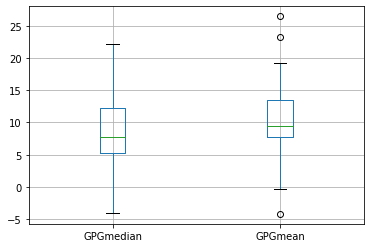

In [4]:
df.boxplot(column=['GPGmedian', 'GPGmean'])

In [5]:
df.describe()

,Code,GPGmedian,GPGmean
count,35.000000,35.000000,35.000000
mean,35.085714,8.705714,10.625714
std,28.307525,5.332031,5.946395
min,0.000000,-4.100000,-4.200000
25%,8.500000,5.250000,7.700000
50%,32.000000,7.800000,9.500000
75%,53.500000,12.250000,13.450000
max,92.000000,22.200000,26.500000


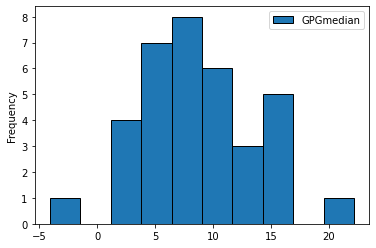

In [6]:
df[['GPGmedian']].plot(kind='hist', ec='black')

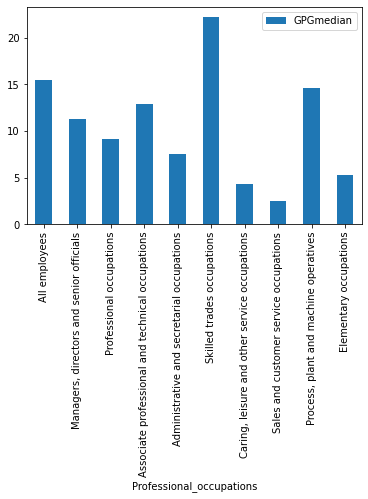

In [15]:
df2.plot.bar(x = 'Professional_occupations', y = 'GPGmedian')

In [12]:
df2.GPGmedian

0    15.5
1    11.3
2     9.1
3    12.9
4     7.5
5    22.2
6     4.3
7     2.5
8    14.6
9     5.3
Name: GPGmedian, dtype: float64

In [3]:
import pandas as pd
import numpy as np

#By default the aggreggate function is mean

df.pivot_table(index=['Professional_occupations'], values=['GPGmean'])

,GPGmean
Professional_occupations,
Administrative occupations,8.2
Business and public service associate professionals,16.8
"Business, media and public service professionals",11.9
Caring personal service occupations,6.6
Corporate managers and directors,12.6
"Culture, media and sports occupations",23.2
Customer service occupations,6.1
Elementary administration and service occupations,8.9
Elementary trades and related occupations,8.4


### Interpreting the estimates 																							
"It should be noted that the figures do not show differences in rates of pay for comparable jobs, as these are affected by factors such as the proportion of men and women working part time or in different occupations. For example, a higher proportion of women work in occupations such as administration and caring, which tend to offer lower salaries. "